In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid')

In [3]:
dfcar = pd.read_csv('carPrice.csv')
dfcar.head()

,car_ID,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- İlk özelliğimiz olan “symboling’’ arabanın sigorta risk seviyesine karşılık gelir. +3 değeri otomobilin riskli olduğunu, -3 değeri ise muhtemelen oldukça güvenli olduğunu söylemektedir.
- 25. özellik “price” bizim hedef değişkenimizdir. Yani bu veri setini kullanarak tahmin etmek istediğimiz değerdir.

In [4]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carCompany        205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
pd.options.display.float_format = '{:.3f}'.format
dfcar.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [6]:
pd.concat([dfcar.isnull().sum(), 100 * dfcar.isnull().sum()/len(dfcar)],
         axis = 1).rename(columns={0:'Missing Records', 1:'Percentage(%)'})

,Missing Records,Percentage(%)
car_ID,0,0.000
symboling,0,0.000
carCompany,0,0.000
fueltype,0,0.000
aspiration,0,0.000
doornumber,0,0.000
carbody,0,0.000
drivewheel,0,0.000
enginelocation,0,0.000
wheelbase,0,0.000


In [8]:
dfcar2 = dfcar.copy()
cols = ['fueltype', 'carCompany','aspiration','doornumber','carbody',
        'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
dfcar3=pd.concat([dfcar2,pd.get_dummies(dfcar2[cols])],axis=1).drop(cols,axis=1)

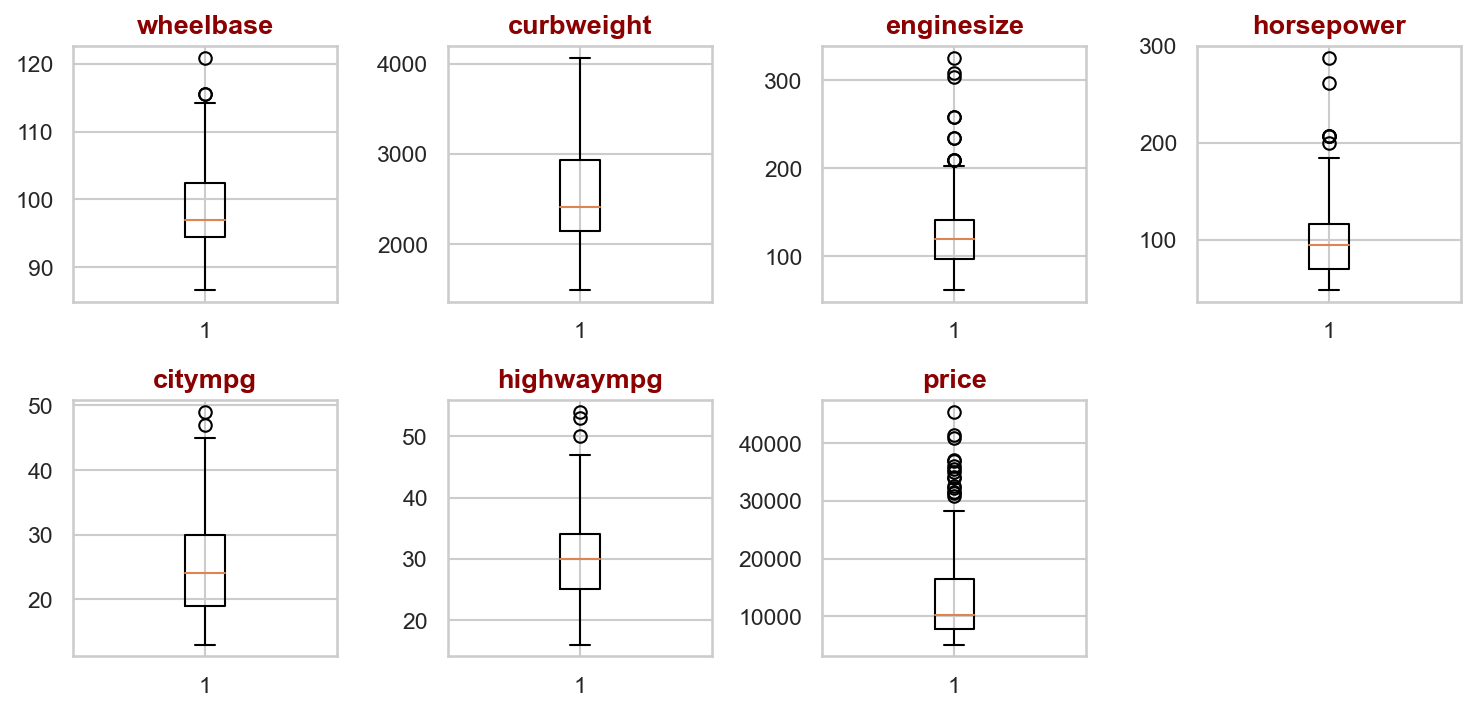

In [15]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=150)
fill_list=['wheelbase','curbweight','enginesize','horsepower','citympg','highwaympg','price']
for i,col in enumerate(fill_list):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfcar)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

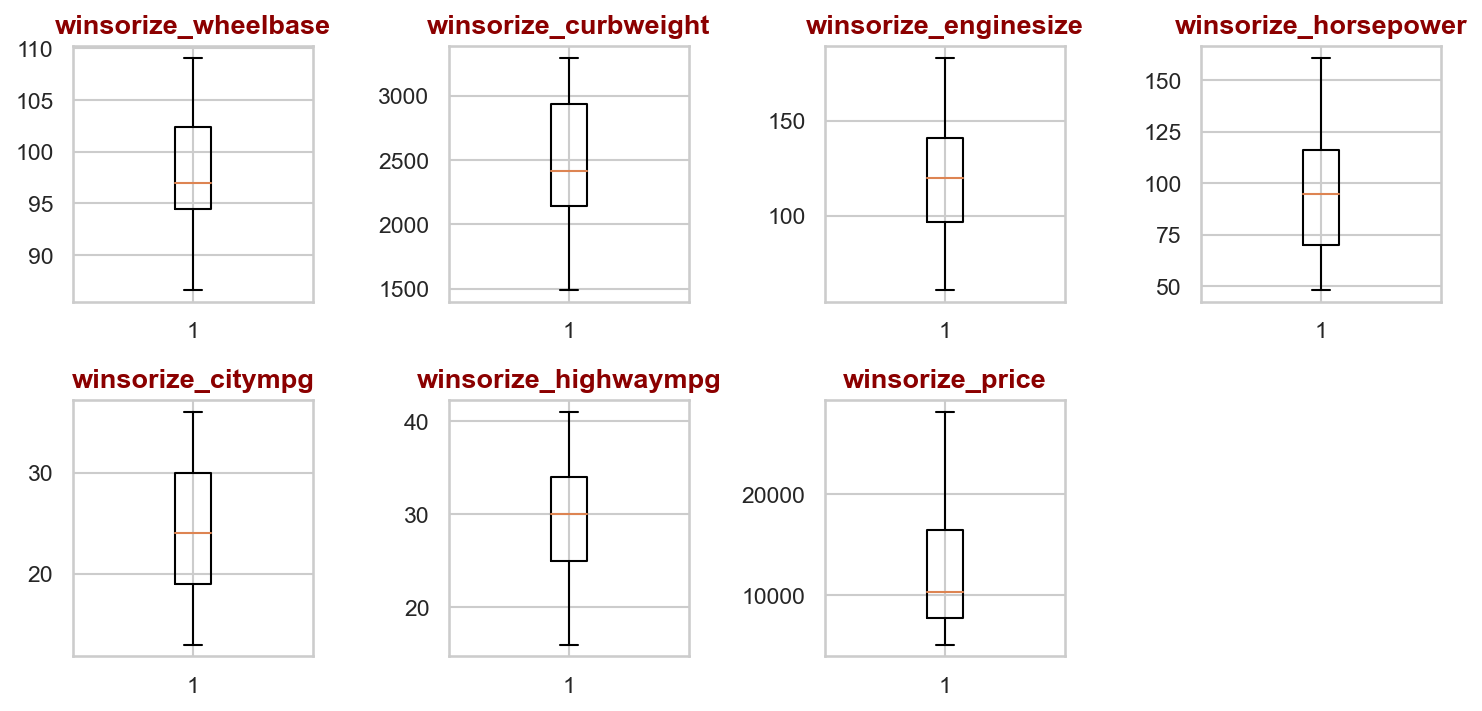

In [16]:
from scipy.stats.mstats import winsorize
dfcarw=pd.DataFrame()
for col in fill_list:
    dfcarw['winsorize_%s'%col]=winsorize(dfcar[col],(0,0.08))
plt.figure(figsize=(10,7),dpi=150)
for i,col in enumerate(dfcarw.columns):
    plt.subplot(3,4,i+1)
    plt.boxplot(col, data=dfcarw)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import zscore
esik_degerleri=pd.DataFrame(columns=['threshold_value','outliers_value','outliers_value_log'])
z_scores=zscore((dfcar['price']))
log_z_scores=zscore((np.log(dfcar['price'])))
for threshold in range(1,5):
    esik_degerleri=esik_degerleri.append({'threshold_value':threshold,
                                          'outliers_value':len(z_scores[z_scores>threshold]),
                                          'outliers_value_log':len(log_z_scores[log_z_scores>threshold])},
                                          ignore_index=True)
display(esik_degerleri)

,threshold_value,outliers_value,outliers_value_log
0,1,24,27
1,2,15,13
2,3,3,0
3,4,1,0


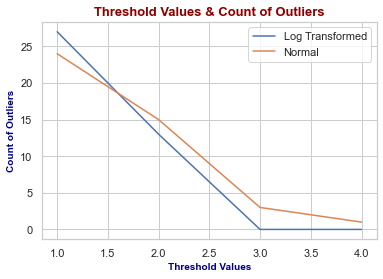

In [18]:
esik_degerleri.plot(x='threshold_value',y=['outliers_value_log','outliers_value'])
plt.title('Threshold Values & Count of Outliers',fontdict=baslik_font)
plt.xlabel('Threshold Values',fontdict=eksen_font)
plt.ylabel('Count of Outliers',fontdict=eksen_font)
plt.legend(('Log Transformed','Normal'))
plt.show()

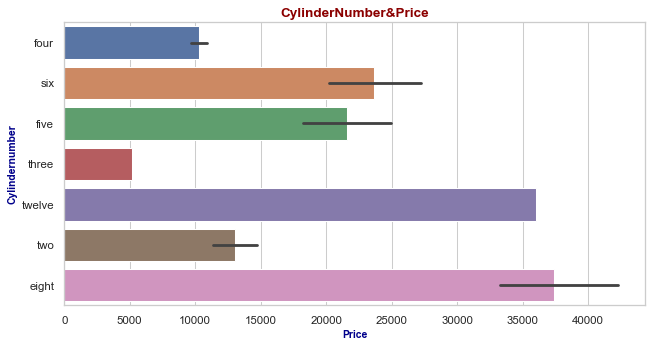

In [19]:
plt.figure(figsize=(10,5),dpi=75)
sns.barplot(dfcar.price,dfcar.cylindernumber)
plt.title('CylinderNumber&Price',fontdict=baslik_font)
plt.xlabel('Price',fontdict=eksen_font)
plt.ylabel('Cylindernumber',fontdict=eksen_font)
plt.show()

In [20]:
numbers=dfcar.cylindernumber.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for cylindernumber",end='')
for i in range(0, len(numbers)):
    for j in range(i+1, len(numbers)):
        ttest = stats.ttest_ind(dfcar[dfcar["cylindernumber"]==numbers[i]]['price'], 
                                dfcar[dfcar["cylindernumber"]==numbers[j]]['price'])
        grup_1 = numbers[i]
        grup_2 = numbers[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:    
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                             "group_2" : grup_2 ,
                                             "statistics": istatistik , 
                                             "p_value" : p_degeri}, ignore_index=True)
display(karsilastirma)

Ttest for cylindernumber

,group_1,group_2,statistics,p_value
0,four,six,-12.64245,0.00000
1,four,five,-8.91183,0.00000
2,four,eight,-15.02224,0.00000
3,six,two,2.36100,0.02600
4,six,eight,-3.30303,0.00270
5,five,two,2.71334,0.01774
6,five,eight,-4.89458,0.00024
7,two,eight,-8.08431,0.00009


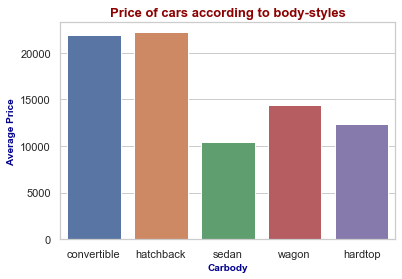

In [21]:
sns.barplot(dfcar['carbody'].unique(),dfcar.groupby(dfcar['carbody']).price.mean())
plt.title('Price of cars according to body-styles',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Carbody',fontdict=eksen_font)
plt.show()

In [22]:

bodies=dfcar.carbody.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for carbody",end='')
for i in range(0, len(bodies)):
    for j in range(i+1, len(bodies)):
        ttest = stats.ttest_ind(dfcar[dfcar["carbody"]==bodies[i]]['price'], 
                                dfcar[dfcar["carbody"]==bodies[j]]['price'])
        grup_1 = bodies[i]
        grup_2 = bodies[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:  
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                            "group_2" : grup_2 ,
                                            "statistics": istatistik , 
                                            "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for carbody

,group_1,group_2,statistics,p_value
0,convertible,hatchback,4.86661,0.00001
1,convertible,sedan,2.07872,0.04020
2,convertible,wagon,3.18255,0.00347
3,hatchback,sedan,-3.51075,0.00058
4,hatchback,hardtop,-4.92730,0.00000
5,sedan,hardtop,-2.36920,0.01971
6,wagon,hardtop,-2.93353,0.00625


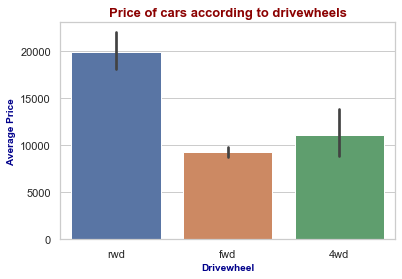

In [23]:
sns.barplot(dfcar.drivewheel,dfcar.price)
plt.title('Price of cars according to drivewheels',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Drivewheel',fontdict=eksen_font)
plt.show()

In [24]:
wheels=dfcar.drivewheel.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for drivewheels",end='')
for i in range(0, len(wheels)):
    for j in range(i+1, len(wheels)):
        ttest = stats.ttest_ind(dfcar[dfcar["drivewheel"]==wheels[i]]['price'], 
                                dfcar[dfcar["drivewheel"]==wheels[j]]['price'])
        grup_1 = wheels[i]
        grup_2 = wheels[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:  
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                            "group_2" : grup_2 ,
                                            "statistics": istatistik , 
                                            "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for drivewheels

,group_1,group_2,statistics,p_value
0,rwd,fwd,11.67001,0.00000
1,rwd,4wd,2.85807,0.00539


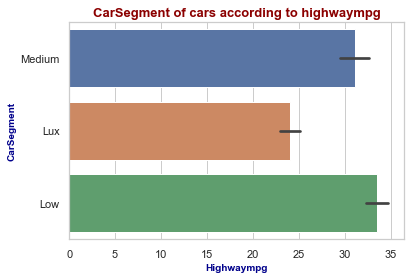

In [26]:
def marka_grupla(marka):
    if dfcar[dfcar.carCompany == marka].price.mean()>=17000:
        return 'Lux'
    elif 10000<=dfcar[dfcar.carCompany==marka].price.mean()<17000:
        return 'Medium'
    else:
        return 'Low'
dfcar['CarSegment'] = dfcar.carCompany.apply(marka_grupla)
sns.barplot(dfcar.highwaympg,dfcar.CarSegment)
plt.title('CarSegment of cars according to highwaympg',fontdict=baslik_font)
plt.ylabel('CarSegment',fontdict=eksen_font)
plt.xlabel('Highwaympg',fontdict=eksen_font)
plt.show()

In [27]:
segment=dfcar.CarSegment.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for CarSegment",end='')
for i in range(0, len(segment)):
    for j in range(i+1, len(segment)):
        ttest = stats.ttest_ind(dfcar[dfcar["CarSegment"]==segment[i]]['highwaympg'], 
                                dfcar[dfcar["CarSegment"]==segment[j]]['highwaympg'])
        grup_1 = segment[i]
        grup_2 = segment[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]
        if p_degeri<0.05:  
            karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                            "group_2" : grup_2 ,
                                            "statistics": istatistik , 
                                            "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for CarSegment

,group_1,group_2,statistics,p_value
0,Medium,Lux,6.28694,0.00000
1,Medium,Low,-2.33023,0.02103
2,Lux,Low,-9.24748,0.00000


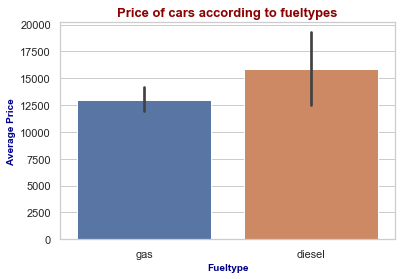

In [28]:
sns.barplot(dfcar['fueltype'],dfcar.price)
plt.title('Price of cars according to fueltypes',fontdict=baslik_font)
plt.ylabel('Average Price',fontdict=eksen_font)
plt.xlabel('Fueltype',fontdict=eksen_font)
plt.show()

In [29]:

types=dfcar.fueltype.unique()
pd.options.display.float_format = '{:.5f}'.format
karsilastirma = pd.DataFrame(columns=['group_1', 'group_2','statistics', 'p_value'])
print("Ttest for fueltype",end='')
for i in range(0, len(types)):
    for j in range(i+1, len(types)):
        ttest = stats.ttest_ind(dfcar[dfcar["fueltype"]==types[i]]['price'], 
                                dfcar[dfcar["fueltype"]==types[j]]['price'])
        grup_1 = types[i]
        grup_2 = types[j]
        istatistik = ttest[0]
        p_degeri = ttest[1]  
        karsilastirma = karsilastirma.append({"group_1" : grup_1 ,
                                                "group_2" : grup_2 ,
                                                "statistics": istatistik , 
                                                "p_value" : p_degeri}, ignore_index=True)
            
display(karsilastirma)

Ttest for fueltype

,group_1,group_2,statistics,p_value
0,gas,diesel,-1.51418,0.13154


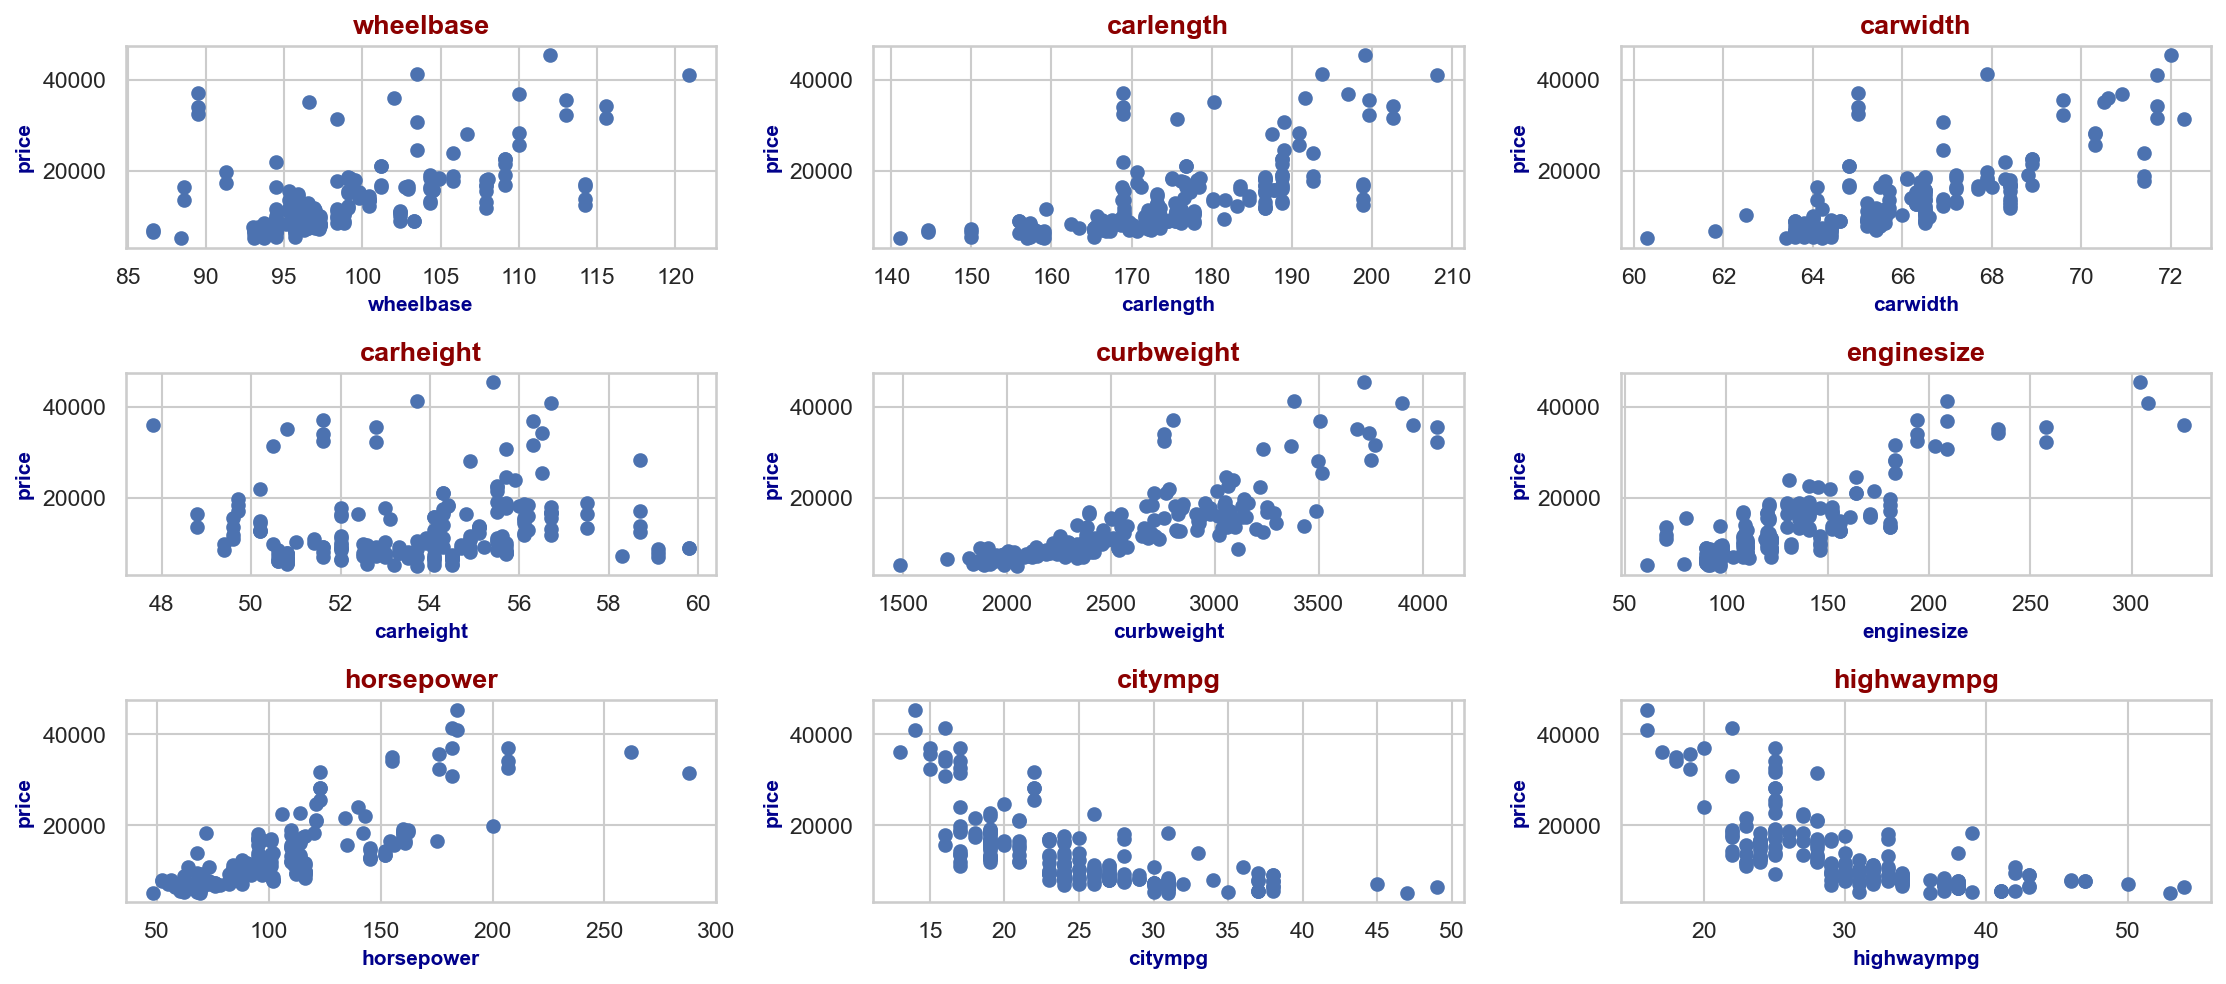

In [30]:

plt.figure(figsize=(15,15),dpi=150)
fill_list2=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','citympg','highwaympg']
for i,col in enumerate(fill_list2):
    plt.subplot(7,3,i+1)
    plt.scatter(col,'price', data=dfcar)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('price',fontdict=eksen_font)
plt.tight_layout()
plt.show()

In [31]:
fill_list2=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','citympg',
            'highwaympg','price']
dfcarlog=pd.DataFrame()
for col in fill_list2:
    dfcarlog['log_%s'%col]=np.log(dfcar[col])

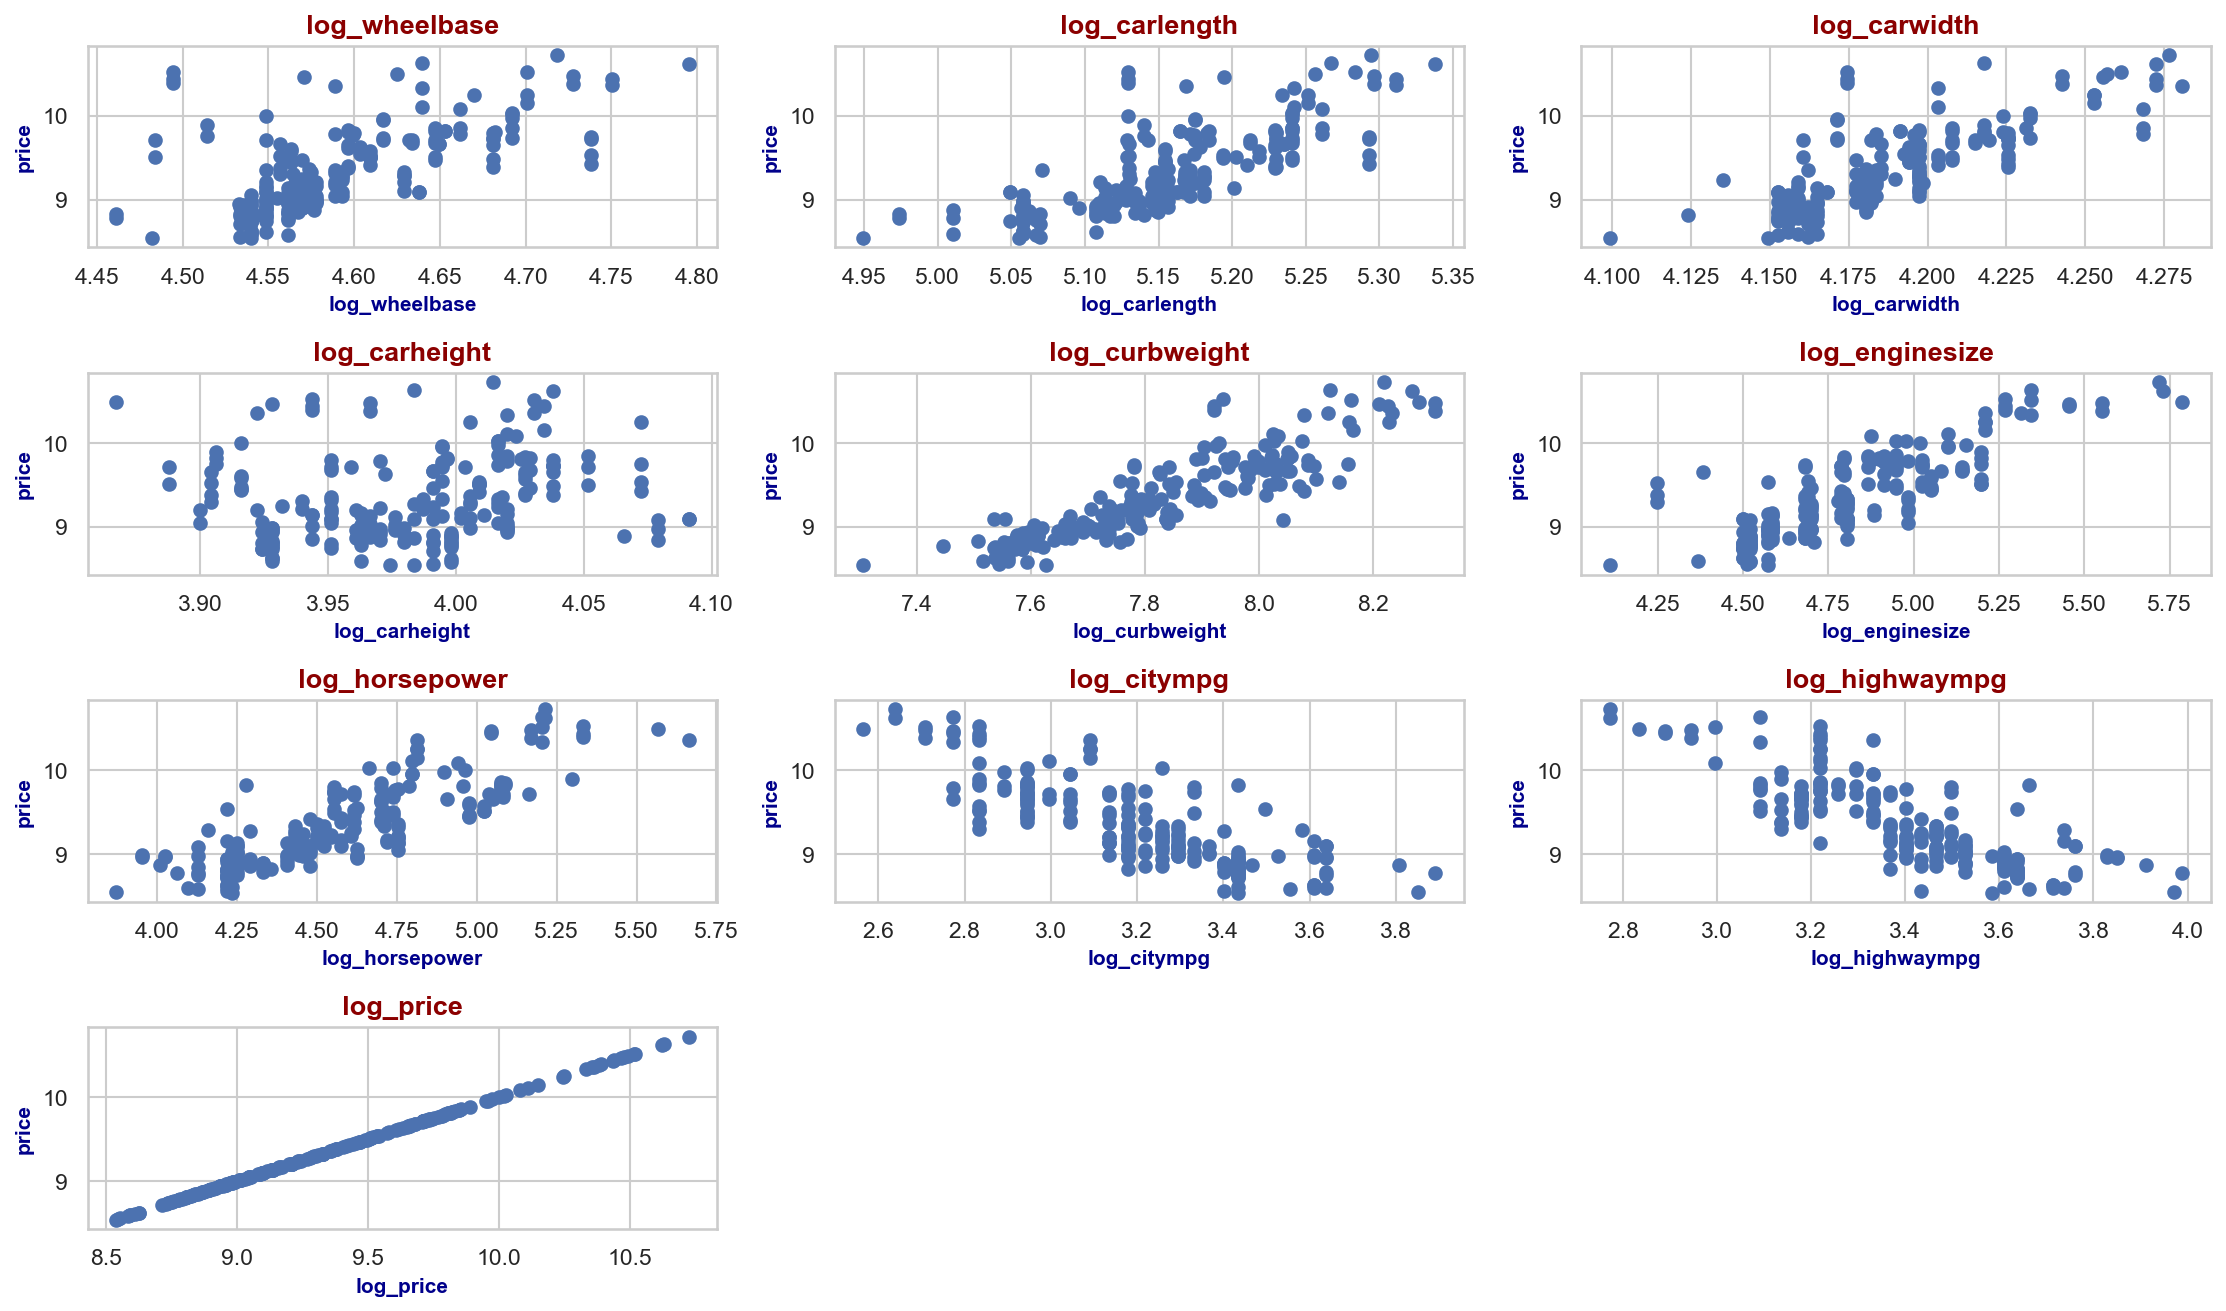

In [32]:

plt.figure(figsize=(15,15),dpi=150)
for i,col in enumerate(dfcarlog.columns):
    plt.subplot(7,3,i+1)
    plt.scatter(col,'log_price', data=dfcarlog)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('price',fontdict=eksen_font)
plt.tight_layout()
plt.show()

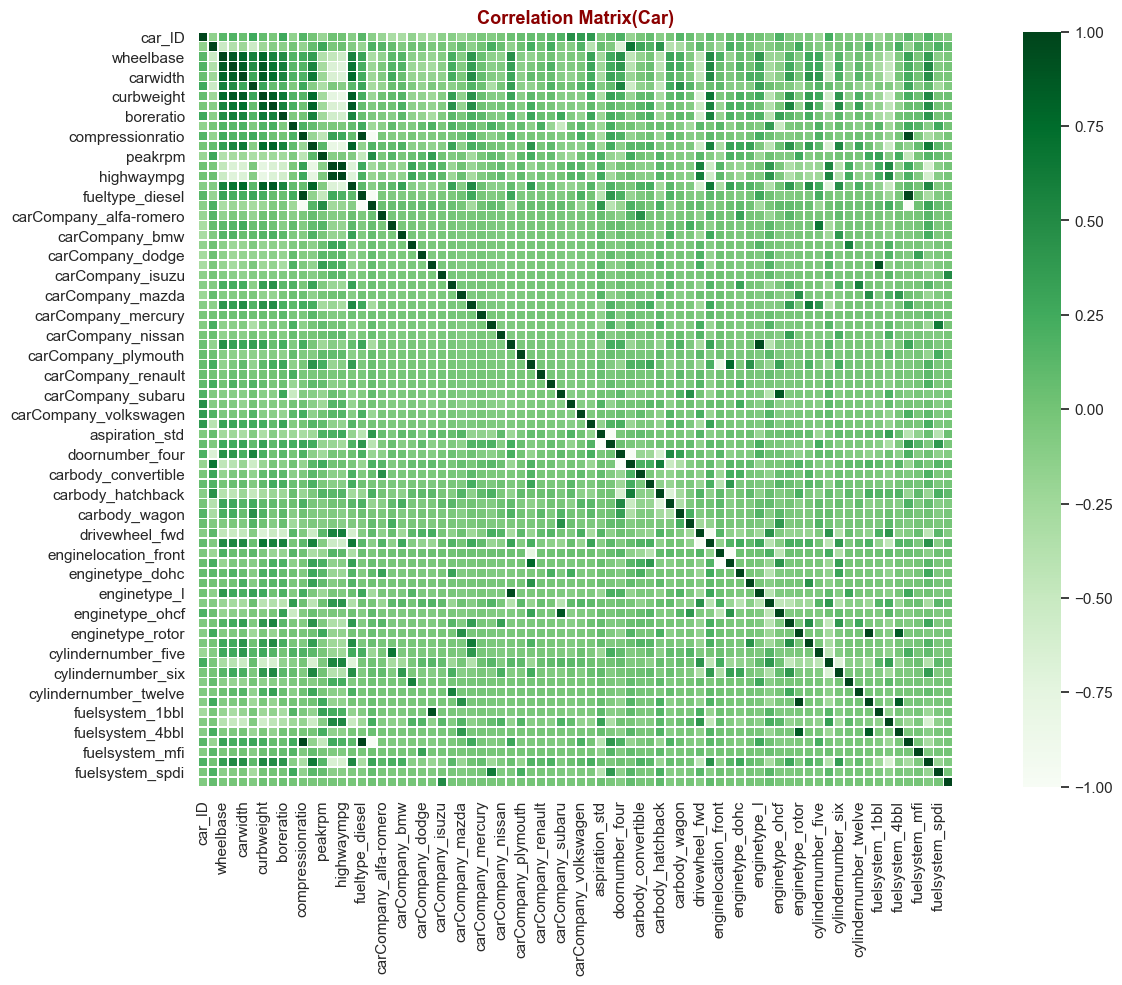

In [33]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dfcar3.corr(),square=True,annot=False,
            linewidths=.5,vmin=-1,vmax=1,cmap='Greens')
plt.title('Correlation Matrix(Car)',fontdict=baslik_font)
display()

In [34]:
high_corr=dfcar3.corr().price.abs().sort_values(ascending=False).index[0:10]
dfcar3[high_corr].corr().price

price                  1.00000
enginesize             0.87414
curbweight             0.83530
horsepower             0.80814
carwidth               0.75933
cylindernumber_four   -0.69776
highwaympg            -0.69760
citympg               -0.68575
carlength              0.68292
drivewheel_rwd         0.63896
Name: price, dtype: float64

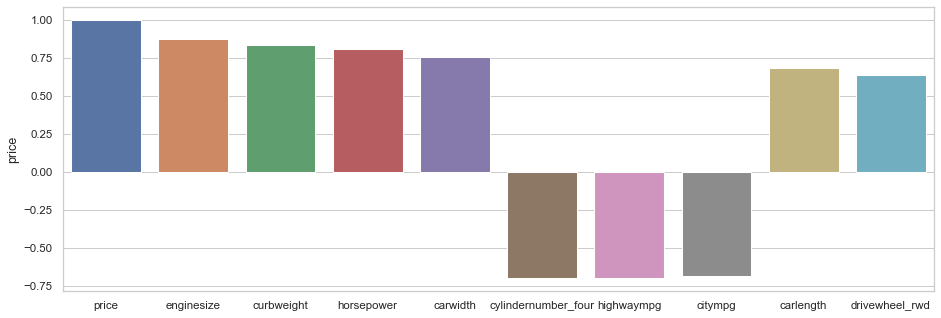

In [35]:
plt.figure(figsize=(15,5),dpi=75)
sns.barplot(x=high_corr,y=dfcar3[high_corr].corr().price)
plt.show()

In [36]:
import plotly.express as px
px.scatter(x = dfcar.citympg, y=dfcar.price, color = dfcar.carCompany)

ModuleNotFoundError: No module named 'plotly'

In [37]:
dfcar[['price','citympg']].corr()

,price,citympg
price,1.00000,-0.68575
citympg,-0.68575,1.00000


In [38]:
import plotly.express as px
px.scatter(x = dfcar.horsepower/dfcar.enginesize, y=dfcar.price, color = dfcar.carCompany)

ModuleNotFoundError: No module named 'plotly'

In [39]:
dfcar['maxpower']=dfcar.horsepower/dfcar.enginesize
dfcar[['price','maxpower']].corr()

,price,maxpower
price,1.00000,0.17195
maxpower,0.17195,1.00000


In [40]:
pd.options.display.float_format='{:.3f}'.format
pe=stats.ttest_ind(dfcar['price'],dfcar['enginesize'])
ph=stats.ttest_ind(dfcar['price'],dfcar['horsepower'])
py=stats.ttest_ind(dfcar['price'],dfcar['citympg'])
pc=stats.ttest_ind(dfcar['price'],dfcar['carwidth'])
pm=stats.ttest_ind(dfcar['price'],dfcar['maxpower'])
print('PE {}\nPH {}\nPY {}\nPC {}\nPM {}'.format(pe,ph,py,pc,pm))

PE Ttest_indResult(statistic=23.56708628315423, pvalue=3.9137381754434676e-78)
PH Ttest_indResult(statistic=23.607962483689974, pvalue=2.600885184349351e-78)
PY Ttest_indResult(statistic=23.749645919160496, pvalue=6.314787574210729e-79)
PC Ttest_indResult(statistic=23.67673045260602, pvalue=1.3081691754850956e-78)
PM Ttest_indResult(statistic=23.79337911485808, pvalue=4.0805778962409194e-79)


In [41]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
pd.options.display.float_format='{:.5f}'.format
ozellikler=['curbweight','enginesize','horsepower']
dagilim_testleri = pd.DataFrame(columns=['attribute', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(dfcar[ozellik]))
    norm_stats = normaltest(np.log(dfcar[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"attribute": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,attribute,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,curbweight,5.20419,0.07412,7.07718,0.02905
1,enginesize,32.57522,0.00000,25.99676,0.00000
2,horsepower,8.56348,0.01382,8.25004,0.01616


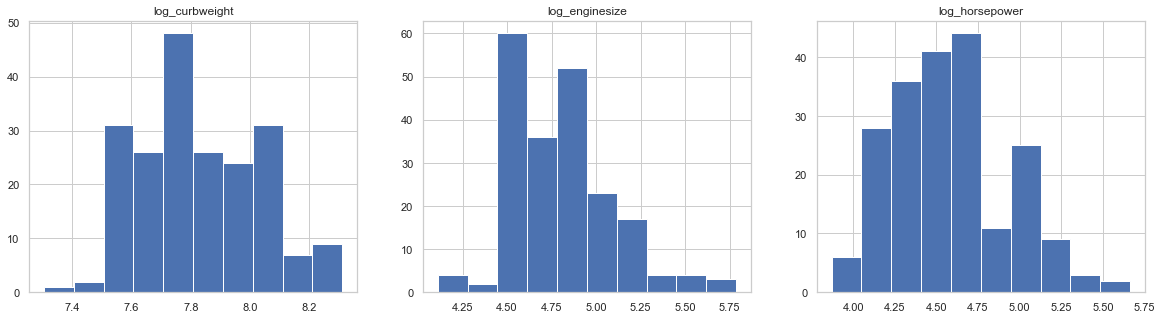

In [42]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(np.log(dfcar.curbweight))
plt.title('log_curbweight')
plt.subplot(132)
plt.hist(np.log(dfcar.enginesize))
plt.title('log_enginesize')
plt.subplot(133)
plt.hist(np.log(dfcar.horsepower))
plt.title('log_horsepower')
plt.show()

In [43]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

[63.38 35.74  0.67]


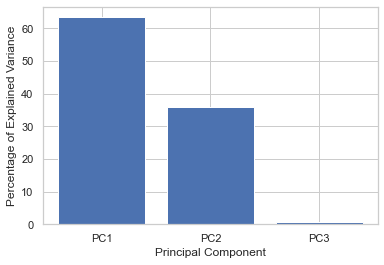

In [44]:

X=dfcar3.copy()
X.drop(columns=['price'],inplace=True)
pca=PCA(n_components=3)
dfcar_pca = pca.fit_transform(X)
components= np.round(pca.explained_variance_ratio_*100,decimals=2) 
labels = ['PC1','PC2','PC3']
plt.bar(x=range(1,len(components)+1), height=components, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
print (components)
plt.show()